<a href="https://colab.research.google.com/github/dp1500/FOOTIVERSE-ML-MODELS/blob/main/model_type_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("/content/final_data_for_model_1.csv")

In [3]:
df.head()

,Unnamed: 0,Unnamed: 0.1,formation,gk rating,defence rating,midfield rating,attack rating,net stamina,net physicallity,away formation,away gk rating,away defence rating,away midfield rating,away attack rating,away net stamina,away net physicallity,home goals,away goals,home_result_list
0,0,0,3-4-3,165,601,133,370,2237,2258,4-4-1-1,285,588,435,370,2314,2342,4,3,W
1,1,1,4-4-2,277,435,282,278,2224,2210,3-5-2,228,491,285,232,2277,2216,0,2,L
2,2,2,3-4-3,312,300,260,340,2232,2267,4-4-1-1,214,485,237,387,2255,2233,2,3,L
3,3,3,3-5-2,145,381,292,215,2217,2322,4-2-3-1,315,602,206,150,2095,2258,0,3,L
4,4,4,3-4-3,226,483,146,152,2346,2317,3-4-3,278,491,357,211,2011,2188,1,0,W


In [4]:
df = df.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1)

In [5]:
len(df['formation'].unique())

27

# encoding formation column using target encoding

In [8]:
df1 = df.copy()

In [9]:
# autos["make_encoded"] = autos.groupby("make")["price"].transform("mean")

df1['formation'] = df1.groupby("formation")["home goals"].transform("mean")
df1['away formation'] = df1.groupby("away formation")["away goals"].transform("mean")

In [10]:
df1.head()

,formation,gk rating,defence rating,midfield rating,attack rating,net stamina,net physicallity,away formation,away gk rating,away defence rating,away midfield rating,away attack rating,away net stamina,away net physicallity,home goals,away goals,home_result_list
0,1.567901,165,601,133,370,2237,2258,0.942529,285,588,435,370,2314,2342,4,3,W
1,1.231047,277,435,282,278,2224,2210,0.975207,228,491,285,232,2277,2216,0,2,L
2,1.567901,312,300,260,340,2232,2267,0.942529,214,485,237,387,2255,2233,2,3,L
3,1.107527,145,381,292,215,2217,2322,1.295652,315,602,206,150,2095,2258,0,3,L
4,1.567901,226,483,146,152,2346,2317,1.254630,278,491,357,211,2011,2188,1,0,W


## getting features and labels before scaling

In [94]:
y_tree_based = df1['home goals'].values

x_tree_based = df1.drop(['home goals', 'away goals', 'home_result_list'], axis=1).values

In [95]:
from sklearn.model_selection import train_test_split

x_train_tree, x_test_tree, y_train_tree, y_test_tree = train_test_split(x_tree_based, y_tree_based, test_size=0.25, random_state= 42)

In [14]:
df2 = df1.copy()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df2[['gk rating', 'defence rating', 'midfield rating',
                                                'attack rating', 'net stamina', 'net physicallity','away gk rating', 'away defence rating', 'away midfield rating',
                                                'away attack rating', 'away net stamina', 'away net physicallity']] = scaler.fit_transform(df2[[ 'gk rating', 'defence rating', 'midfield rating',
                                                'attack rating', 'net stamina', 'net physicallity','away gk rating', 'away defence rating', 'away midfield rating',
                                                'away attack rating', 'away net stamina', 'away net physicallity']])

In [15]:
df3 = df1.copy()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()

df3[['gk rating', 'defence rating', 'midfield rating',
                                                'attack rating', 'net stamina', 'net physicallity','away gk rating', 'away defence rating', 'away midfield rating',
                                                'away attack rating', 'away net stamina', 'away net physicallity']] = mms.fit_transform(df3[[ 'gk rating', 'defence rating', 'midfield rating',
                                                'attack rating', 'net stamina', 'net physicallity','away gk rating', 'away defence rating', 'away midfield rating',
                                                'away attack rating', 'away net stamina', 'away net physicallity']])

In [ ]:
df3.head()

,formation,gk rating,defence rating,midfield rating,attack rating,net stamina,net physicallity,away formation,away gk rating,away defence rating,away midfield rating,away attack rating,away net stamina,away net physicallity,home goals,away goals,home_result_list
0,1.567901,0.112360,0.611285,0.203053,0.838798,0.724951,0.650467,0.942529,0.561798,0.590909,0.664122,0.717054,0.876228,0.807477,4,3,W
1,1.231047,0.531835,0.351097,0.430534,0.587432,0.699411,0.560748,0.975207,0.348315,0.438871,0.435115,0.449612,0.803536,0.571963,0,2,L
2,1.567901,0.662921,0.139498,0.396947,0.756831,0.715128,0.667290,0.942529,0.295880,0.429467,0.361832,0.750000,0.760314,0.603738,2,3,L
3,1.107527,0.037453,0.266458,0.445802,0.415301,0.685658,0.770093,1.295652,0.674157,0.612853,0.314504,0.290698,0.445972,0.650467,0,3,L
4,1.567901,0.340824,0.426332,0.222901,0.243169,0.939096,0.760748,1.254630,0.535581,0.438871,0.545038,0.408915,0.280943,0.519626,1,0,W


In [ ]:
y = df3[['home goals','away goals']].values
x = df3.drop(['home goals', 'away goals', 'home_result_list'], axis=1).values

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=2)

#MODEL BUILDING USING LOGISTIC REGRESSION

## LogisticRegression is not inherently multiout put so we use result data as labels

In [56]:
y_logistic = df3['home_result_list'].values
x_logistic = df3.drop(['home goals', 'away goals', 'home_result_list'], axis=1).values

for i in range(len(y_logistic)):
  if y_logistic[i] == 'W':
    y_logistic[i] = 2
  if y_logistic[i] == 'D':
    y_logistic[i] = 1
  if y_logistic[i] == 'L':
    y_logistic[i] = 0

y_logistic = np.array(y_logistic)

y_logistic = y_logistic.astype('int')

y_logistic
# from sklearn import preprocessing
# le = preprocessing.LabelEncoder()
# y_logistic = le.fit_transform(y_logistic)
# y_logistic

array([2, 0, 0, ..., 2, 2, 1])

In [58]:
from sklearn.model_selection import train_test_split

X_train_logistic, X_test_logistic, y_train_logistic, y_test_logistic = train_test_split(x_logistic, y_logistic, test_size=0.15, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
LogisticRegressor = LogisticRegression(multi_class= "multinomial")
LogisticRegressor.fit(X_train_logistic,y_train_logistic)

LogisticRegression(multi_class='multinomial')

In [ ]:
predictions_Logistic = LogisticRegressor.predict(X_test_logistic)
predictions_Logistic

array([0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 2, 0, 0, 2, 0,
       2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 2, 0,
       0, 2, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2])

## metrics

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test_logistic, predictions_Logistic)

0.5443037974683544

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test_logistic, predictions_Logistic)

array([[19,  0,  9],
       [ 9,  0, 14],
       [ 4,  0, 24]])

In [ ]:
from sklearn.metrics import classification_report
 
print(classification_report(y_test_logistic, predictions_Logistic))

              precision    recall  f1-score   support

           0       0.59      0.68      0.63        28
           1       0.00      0.00      0.00        23
           2       0.51      0.86      0.64        28

    accuracy                           0.54        79
   macro avg       0.37      0.51      0.42        79
weighted avg       0.39      0.54      0.45        79



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# k nearest neighbour model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNeig_Classifier = KNeighborsClassifier(n_neighbors= 2)
KNeig_Classifier.fit(X_train_logistic, y_train_logistic)

KNeig_predictions = KNeig_Classifier.predict(X_test_logistic)


In [ ]:
# X_train_logistic, X_test_logistic, y_train_logistic, y_test_logistic

In [ ]:
y_results = df1['home_result_list'].values

x_tree_based = df1.drop(['home goals', 'away goals', 'home_result_list'], axis=1).values

In [ ]:
from sklearn.model_selection import train_test_split

x_train_tree, x_test_tree, y_train_tree, y_test_tree = train_test_split(x_tree_based, y_tree_based, test_size=0.20, random_state= 10)

# RANDOM FOREST

In [54]:
from sklearn.ensemble import RandomForestClassifier
RF_Classifier = RandomForestClassifier(max_depth=15, max_features = None, n_estimators=100)
    # min_samples_split=3, max_leaf_nodes=5

RF_Classifier.fit(x_train_tree,y_train_tree)
RF_Classifier_predictions = RF_Classifier.predict(x_test_tree)
RF_Classifier_predictions

RF_Classifier_training_predictions = RF_Classifier.predict(x_train_tree)

## METRICS

In [55]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test_tree, RF_Classifier_predictions), accuracy_score(y_train_tree, RF_Classifier_training_predictions))

0.2984126984126984 0.981687898089172


In [39]:
len(y_test_tree)

315

In [38]:
from sklearn.metrics import classification_report

print(classification_report(y_test_tree, RF_Classifier_predictions))

              precision    recall  f1-score   support

           0       0.31      0.30      0.31        79
           1       0.38      0.50      0.43       101
           2       0.27      0.24      0.25        84
           3       0.24      0.12      0.16        33
           4       0.00      0.00      0.00         9
           5       0.20      0.14      0.17         7
           6       0.00      0.00      0.00         2

    accuracy                           0.32       315
   macro avg       0.20      0.19      0.19       315
weighted avg       0.30      0.32      0.30       315



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
len(train_results)

1335

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa126d526d0>]],
      dtype=object)

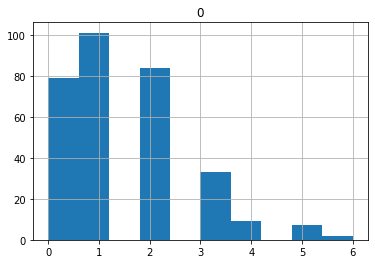

In [35]:
b = pd.DataFrame(y_test_tree)
b.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa11d1156d0>]],
      dtype=object)

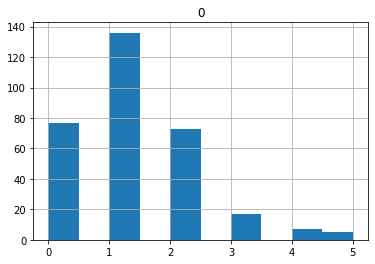

In [36]:
# a = np.unique(RF_Classifier_result, return_counts=True)
a = pd.DataFrame(RF_Classifier_predictions)
a.hist()

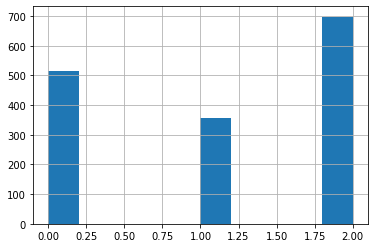

In [ ]:
distribution_home_results = df1['home_result_list']
distribution_home_results.hist()

## RF FOR ONLY RESULTS

In [60]:
RF_Classifier_OnlyResults = RandomForestClassifier(max_depth=15, max_features = None, n_estimators=100)
RF_Classifier_OnlyResults.fit(X_train_logistic,y_train_logistic)

RF_Classifier_OnlyResults_predictions = RF_Classifier_OnlyResults.predict(X_test_logistic)

RF_Classifier_OnlyResults_predictions_training  = RF_Classifier_OnlyResults.predict(X_train_logistic)


## METRICS

In [61]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test_logistic, RF_Classifier_OnlyResults_predictions), accuracy_score(y_train_logistic, RF_Classifier_OnlyResults_predictions_training))

0.5 0.9887640449438202


In [62]:
from sklearn.metrics import classification_report

print(classification_report(y_test_logistic, RF_Classifier_OnlyResults_predictions))

              precision    recall  f1-score   support

           0       0.47      0.52      0.49        79
           1       0.29      0.19      0.23        54
           2       0.59      0.65      0.62       103

    accuracy                           0.50       236
   macro avg       0.45      0.45      0.45       236
weighted avg       0.48      0.50      0.49       236



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa11d0baeb0>]],
      dtype=object)

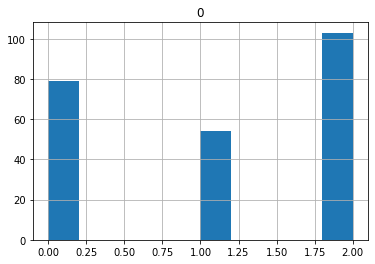

In [63]:
b = pd.DataFrame(y_test_logistic)
b.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa11d043070>]],
      dtype=object)

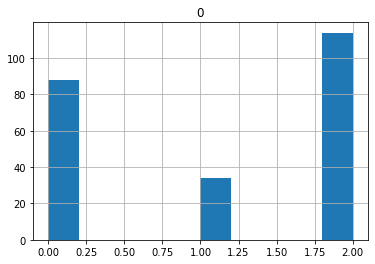

In [64]:
# a = np.unique(RF_Classifier_result, return_counts=True)
a = pd.DataFrame(RF_Classifier_OnlyResults_predictions)
a.hist()

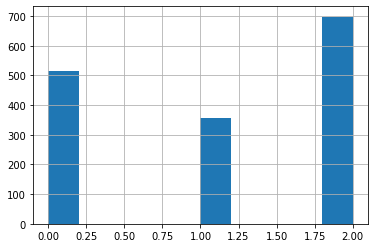

In [ ]:
distribution_home_results = df1['home_result_list']
distribution_home_results.hist()

# GradientBoostingClassifier

In [ ]:
y_home_goals = df1['home goals'].values
y_away_goals = df1['away goals'].values
x_tree_GB = df1.drop(['home goals', 'away goals', 'home_result_list'], axis=1).values

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

home_goals_Classifier = GradientBoostingClassifier(max_depth=None,max_features = None, n_estimators=100)
away_goals_Classifier = GradientBoostingClassifier(max_depth=None,max_features = None, n_estimators=100)

home_goals_Classifier.fit(x_tree_GB,y_home_goals)
away_goals_Classifier.fit(x_tree_GB,y_away_goals)

home_goals_prediction_test = home_goals_Classifier.predict(X_test_tree)
away_goals_prediction_test = away_goals_Classifier.predict(X_test_tree)




RF_Classifier_predictions = np.column_stack((home_goals_prediction_test,away_goals_prediction_test))


home_goals_prediction_train = home_goals_Classifier.predict(X_train_tree)
away_goals_prediction_train = away_goals_Classifier.predict(X_train_tree)

RF_Classifier_training_predictions = np.column_stack((home_goals_prediction_train,away_goals_prediction_train))


# RF_Classifier_predictions = RF_Classifier.predict(X_test_tree)
# RF_Classifier_predictions

# RF_Classifier_training_predictions = RF_Classifier.predict(X_train_tree)

In [ ]:
RF_Classifier_predictions

In [ ]:
RF_Classifier_result = []
for i in range(len(RF_Classifier_predictions)):
  if RF_Classifier_predictions[i][0] - RF_Classifier_predictions[i][1] > 0:
    RF_Classifier_result.append(2)

  if RF_Classifier_predictions[i][0] - RF_Classifier_predictions[i][1] < 0:
    RF_Classifier_result.append(0)
    
  if RF_Classifier_predictions[i][0] - RF_Classifier_predictions[i][1] == 0:
    RF_Classifier_result.append(1)

RF_Classifier_result = np.array(RF_Classifier_result)

#####################################################################

RF_Classifier_train_result = []
for i in range(len(RF_Classifier_training_predictions)):
  if RF_Classifier_training_predictions[i][0] - RF_Classifier_training_predictions[i][1] > 0:
    RF_Classifier_train_result.append(2)

  if RF_Classifier_training_predictions[i][0] - RF_Classifier_training_predictions[i][1] < 0:
    RF_Classifier_train_result.append(0)
    
  if RF_Classifier_training_predictions[i][0] - RF_Classifier_training_predictions[i][1] == 0:
    RF_Classifier_train_result.append(1)

RF_Classifier_train_result = np.array(RF_Classifier_train_result)

test_results = []
for i in range(len(RF_Classifier_result)):
  if y_test_tree[i][0] - y_test_tree[i][1] > 0:
    test_results.append(2)
  if y_test_tree[i][0] - y_test_tree[i][1] < 0:
    test_results.append(0)
  if y_test_tree[i][0] - y_test_tree[i][1] == 0:
    test_results.append(1)

test_results = np.array(test_results)

train_results = []
for i in range(len(RF_Classifier_training_predictions)):
  if y_train_tree[i][0] - y_train_tree[i][1] > 0:
    train_results.append(2)
  if y_train_tree[i][0] - y_train_tree[i][1] < 0:
    train_results.append(0)
  if y_train_tree[i][0] - y_train_tree[i][1] == 0:
    train_results.append(1)

train_results = np.array(train_results)

In [ ]:
RF_Classifier_result

array([2, 2, 1, 2, 1, 0, 0, 2, 2, 0, 0, 0, 0, 2, 1, 2, 1, 2, 2, 2, 1, 0,
       0, 1, 0, 2, 1, 0, 2, 0, 2, 0, 0, 0, 2, 2, 2, 2, 0, 0, 2, 0, 2, 1,
       2, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 2, 2, 1, 1, 0, 2, 0, 2, 2, 2,
       2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 1, 0, 2, 2, 0, 2,
       2, 0, 2, 2, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 1, 2, 2, 0,
       2, 2, 2, 1, 1, 0, 2, 0, 2, 1, 0, 0, 1, 1, 2, 0, 2, 2, 0, 0, 0, 2,
       2, 1, 2, 2, 0, 2, 1, 1, 2, 0, 2, 0, 2, 0, 2, 1, 0, 2, 1, 0, 1, 0,
       1, 0, 1, 2, 0, 0, 2, 2, 1, 0, 1, 1, 2, 0, 0, 2, 2, 0, 2, 2, 2, 0,
       1, 1, 0, 2, 2, 2, 0, 2, 1, 2, 2, 2, 2, 2, 0, 1, 2, 0, 1, 2, 2, 1,
       1, 2, 0, 1, 2, 1, 0, 1, 2, 0, 2, 0, 2, 0, 1, 1, 0, 1, 0, 2, 0, 2,
       2, 0, 1, 2, 2, 0, 1, 2, 0, 2, 1, 2, 1, 2, 2, 2])

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(test_results, RF_Classifier_result), accuracy_score(train_results, RF_Classifier_train_result))

0.3898305084745763 0.4202247191011236


In [ ]:
print(classification_report(test_results, RF_Classifier_result))

              precision    recall  f1-score   support

           0       0.39      0.35      0.37        80
           1       0.17      0.20      0.18        51
           2       0.49      0.50      0.49       105

    accuracy                           0.38       236
   macro avg       0.35      0.35      0.35       236
weighted avg       0.39      0.38      0.38       236



In [ ]:
len(train_results)

1335

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f15b85b2220>]],
      dtype=object)

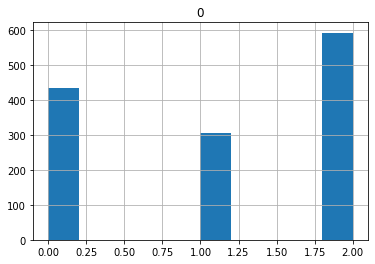

In [ ]:
b = pd.DataFrame(train_results)
b.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f15b852a880>]],
      dtype=object)

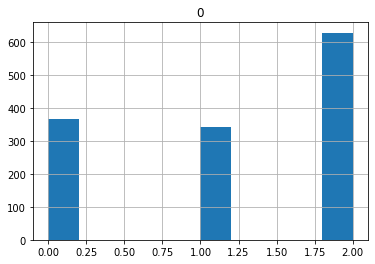

In [ ]:
# a = np.unique(RF_Classifier_result, return_counts=True)
a = pd.DataFrame(RF_Classifier_train_result)
a.hist()

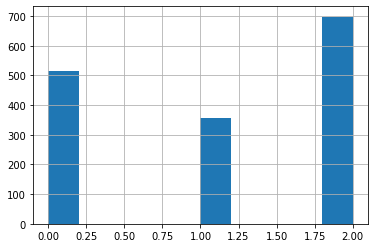

In [ ]:
distribution_home_results = df1['home_result_list']
distribution_home_results.hist()

# NEURAL NETWORK

## preproscessing

In [102]:
y_tree_based = df1['home goals'].values

x_tree_based = df1.drop(['home goals', 'away goals', 'home_result_list'], axis=1).values

In [103]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_tree_based = scaler.fit_transform(x_tree_based)

In [191]:
from sklearn.model_selection import train_test_split

x_train_tree, x_test_tree, y_train_tree, y_test_tree = train_test_split(x_tree_based, y_tree_based, test_size=0.15, random_state= 42)

## model

In [204]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                   hidden_layer_sizes=(300, 12),  activation='relu', learning_rate='constant', 
                    learning_rate_init=0.0001, power_t=0.5, max_iter=700)

clf.fit(x_train_tree,y_train_tree)

RF_Classifier_predictions = clf.predict(x_test_tree)

RF_Classifier_training_predictions = RF_Classifier.predict(x_train_tree)

In [205]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test_tree, RF_Classifier_predictions), accuracy_score(y_train_tree, RF_Classifier_training_predictions))

0.2457627118644068 0.3161048689138577


In [206]:
from sklearn.metrics import classification_report

print(classification_report(y_test_tree, RF_Classifier_predictions))

              precision    recall  f1-score   support

           0       0.20      0.24      0.22        54
           1       0.30      0.25      0.27        80
           2       0.31      0.34      0.32        56
           3       0.20      0.14      0.17        28
           4       0.10      0.08      0.09        12
           5       0.11      0.20      0.14         5
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         1

    accuracy                           0.25       236
   macro avg       0.15      0.16      0.15       236
weighted avg       0.25      0.25      0.25       236



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa118c2a9a0>]],
      dtype=object)

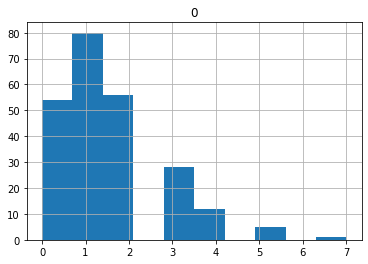

In [207]:
b = pd.DataFrame(y_test_tree)
b.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa118a8b100>]],
      dtype=object)

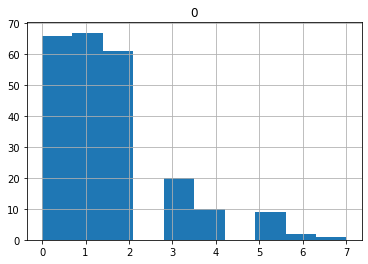

In [208]:
# a = np.unique(RF_Classifier_result, return_counts=True)
a = pd.DataFrame(RF_Classifier_predictions)
a.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa118a34910>]],
      dtype=object)

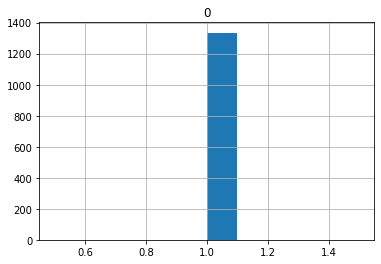

In [209]:
a = pd.DataFrame(RF_Classifier_training_predictions)
a.hist()


In [210]:
actualResults_vs_PredictedResults = np.column_stack((y_test_tree,RF_Classifier_predictions))
actualResults_vs_PredictedResults

array([[2, 1],
       [1, 2],
       [0, 0],
       [5, 2],
       [4, 1],
       [0, 4],
       [0, 1],
       [1, 1],
       [0, 5],
       [0, 2],
       [2, 0],
       [1, 5],
       [2, 1],
       [1, 2],
       [1, 2],
       [0, 2],
       [1, 0],
       [1, 2],
       [0, 1],
       [1, 0],
       [3, 3],
       [4, 1],
       [1, 1],
       [1, 1],
       [1, 2],
       [1, 0],
       [0, 1],
       [0, 0],
       [0, 1],
       [1, 3],
       [0, 0],
       [1, 2],
       [2, 0],
       [2, 2],
       [4, 1],
       [2, 1],
       [4, 0],
       [0, 2],
       [1, 6],
       [2, 1],
       [1, 1],
       [4, 0],
       [0, 0],
       [0, 3],
       [1, 0],
       [4, 2],
       [0, 2],
       [0, 2],
       [3, 1],
       [3, 1],
       [2, 2],
       [1, 1],
       [2, 0],
       [2, 1],
       [0, 3],
       [0, 0],
       [2, 2],
       [0, 3],
       [2, 0],
       [1, 2],
       [0, 2],
       [2, 0],
       [0, 1],
       [2, 4],
       [1, 3],
       [0, 0],
       [0,